## Calculating the Return of a Portfolio of Securities

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5489 entries, 1999-12-31 to 2021-10-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BP      5489 non-null   float64
 1   F       5489 non-null   float64
 2   XOM     5489 non-null   float64
 3   LNC     5489 non-null   float64
 4   AAPL    5489 non-null   float64
dtypes: float64(5)
memory usage: 257.3 KB


In [4]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
1999-12-31,21.365761,15.407578,20.735979,24.217455,0.788183
2000-01-03,21.185650,15.136631,20.156843,23.649864,0.858137
2000-01-04,21.073078,14.630873,19.770760,22.968752,0.785788
2000-01-05,21.793524,14.685064,20.848577,22.174107,0.797286
2000-01-06,21.838551,14.703129,21.926399,22.579933,0.728290


In [5]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2021-10-18,29.709999,15.560000,62.560001,72.760002,146.550003
2021-10-19,29.860001,15.420000,63.500000,73.940002,148.759995
2021-10-20,30.129999,16.040001,63.849998,75.760002,149.259995
2021-10-21,29.440001,16.549999,62.689999,74.730003,149.479996
2021-10-22,29.510000,16.280001,63.119999,75.720001,148.690002


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [6]:
mydata.iloc[0]

BP      21.365761
F       15.407578
XOM     20.735979
LNC     24.217455
AAPL     0.788183
Name: 1999-12-31 00:00:00, dtype: float64

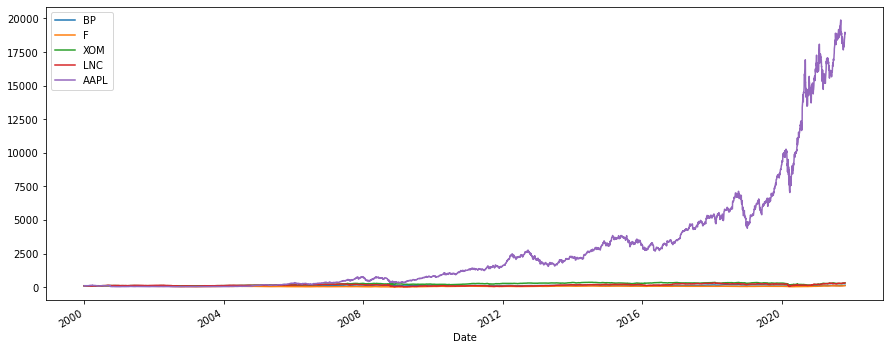

In [8]:
#this is done so all start with same point (easily comparable)
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [9]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.008430,-0.017585,-0.027929,-0.023437,0.088754
2000-01-04,-0.005314,-0.033413,-0.019154,-0.028800,-0.084310
2000-01-05,0.034188,0.003704,0.054516,-0.034597,0.014633
2000-01-06,0.002066,0.001230,0.051698,0.018302,-0.086538


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [10]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [11]:
annual_returns = returns.mean() * 250
annual_returns

BP      0.059969
F       0.090053
XOM     0.084717
LNC     0.194765
AAPL    0.322504
dtype: float64

In [12]:
np.dot(annual_returns, weights)

0.1504016191956098

Transform the result into a percentage form. 

In [13]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

15.040000000000001 %


Is the return of this portfolio satisfactory?